<a href="https://colab.research.google.com/github/sirinao/Airline-Passenger-Referral/blob/main/APRP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**

**Project Title** : Airline Passenger Referral Prediction

Project Type - Classification

Contribution - Individual

Name - Siri Chandana Tammineni

# **Project Summary -**

##**Context**:

Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choices and free text questions. Data is scrapped in Spring 2019.

##**Object :**
**bold text**The main object is predict whether the passengers will refer the airline to their friends.

# **GitHub Link -**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


5. You have to create at least 20 logical & meaningful charts having important insights.

[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]


## ***1. Know Your Data***

###**Importing the Libraries**

In [ ]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import lightgbm

# Warnings module handles warnings in Python
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing all models from sklearn to be used in our model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
import time
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB


# Importing  metrics for evaluation for our models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

In [ ]:
#importing the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###**Dataset Loading**

In [ ]:
# Loading the dataset
airline = pd.read_excel('/content/drive/MyDrive/Almabetter/Project/Data/data_airline_reviews.xlsx')

### **Dataset First View**

In [ ]:
airline.head(2)

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes


##**Descriptions** :

**airline**: Name of the airline.

**overall**: Overall point is given to the trip between 1 to 10.

**author**: Author of the trip

**review date**: Date of the Review

**customer review**:Review of the customers in free text format

**aircraft**: Type of the aircraft

**traveller** type: Type of traveler (e.g. business, leisure)

**cabin**: Cabin at the flight date flown: Flight date

**seat comfort**: Rated between 1-5

**cabin service**: Rated between 1-5

**foodbev**: Rated between 1-5

**entertainment**: Rated between 1-5

**ground service**: Rated between 1-5

**value for money**: Rated between 1-5

**recommended**: Binary, target variable.

### **Dataset Rows & Columns count**

In [ ]:
#check no.of rows and columns

airline.shape

(131895, 17)

###**Dataset Information**

In [ ]:
#check information about all columns
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [ ]:
# describe the numerical dataset
airline.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
#checking duplicated values
airline.duplicated().sum()

70711

In [ ]:
air = airline.copy()

In [ ]:
air.shape

(131895, 17)

In [ ]:
#removing the duplicate values

air.drop_duplicates(inplace = True)

In [ ]:
air.duplicated().sum()

0

In [ ]:
air.shape

(61184, 17)

###Missing Values/Null Values

In [ ]:
# check null values
air.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [ ]:
air.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,59401.000000,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000
mean,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849
std,3.483701,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


###**Exploratory Data And Visualization**

<Axes: xlabel='traveller_type'>

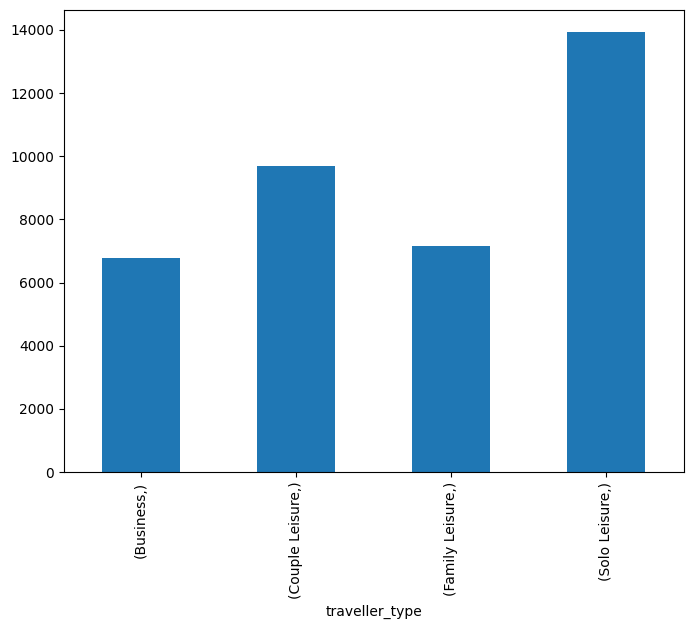

In [ ]:
ty = air[['traveller_type']].value_counts()
ty.sort_index(inplace =True)
plt.figure(figsize=(8,6))
ty.plot(kind = 'bar')

*  Solo Leisure type of travellers are more in count


<Axes: xlabel='cabin', ylabel='count'>

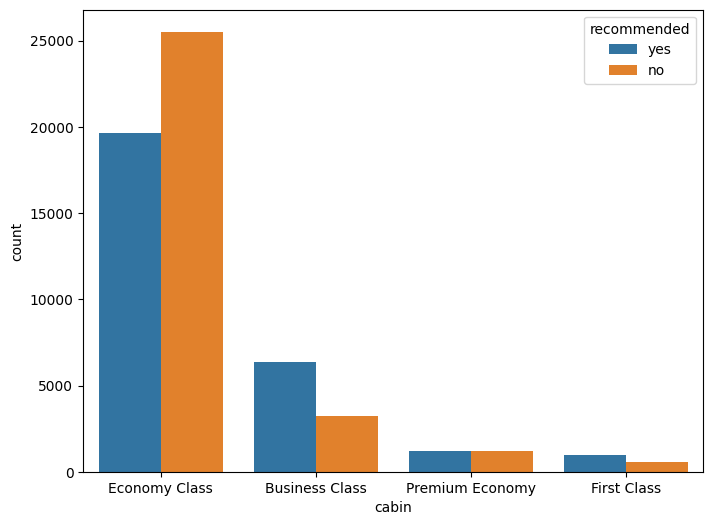

In [ ]:
#Cabin Vs Recommended

plt.figure(figsize=(8,6))
sns.countplot(data=air, x="cabin", hue="recommended")

*   Economy class is used more by people coparitively however it also have high recommendation with bad reviews
*   Business class has more good review recommending

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

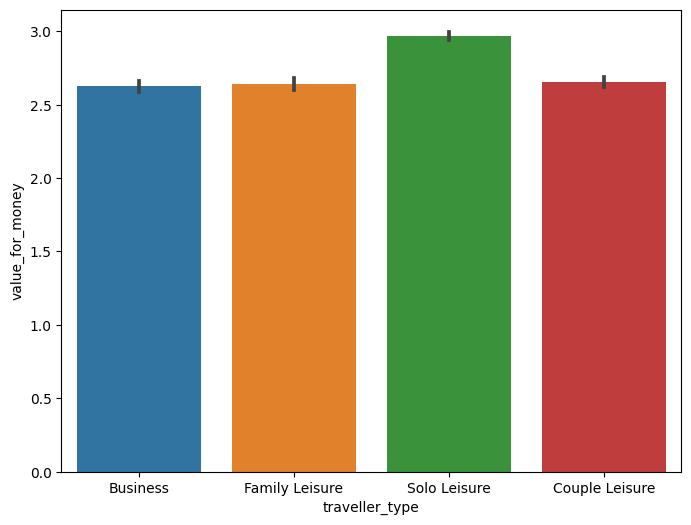

In [ ]:
#Traveller type and Value for money

plt.figure(figsize=(8,6))
sns.barplot(x=air['traveller_type'],y=air['value_for_money'])

- Solo leisure type of traveller little bit more worth of money than other type of travel

In [ ]:
#Cabin vs food and beverages Vs Entertainment

eda_4=air.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
eda_4

,cabin,food_bev,entertainment
0,Business Class,3.525108,3.356407
1,Economy Class,2.776919,2.758083
2,First Class,3.384295,3.280827
3,Premium Economy,2.919603,3.038980


<Axes: xlabel='cabin'>

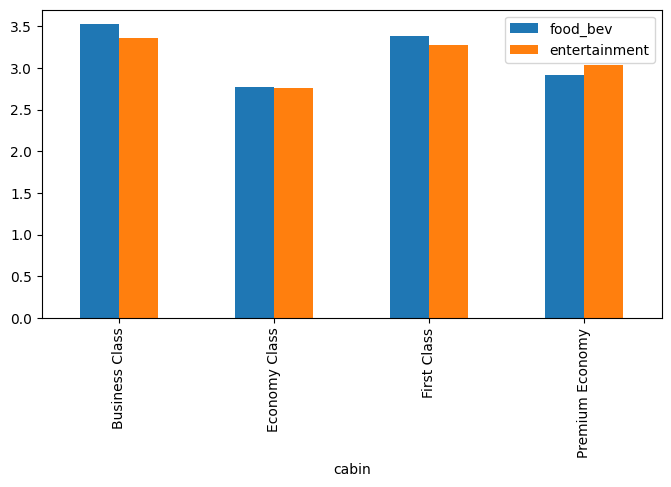

In [ ]:
plt.rcParams['figure.figsize']=(8,4)
eda_4.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")

*   Food, Beverages and Entertainment have more rating in business class while Economy class has lowest rating.

<Axes: xlabel='cabin', ylabel='cabin_service'>

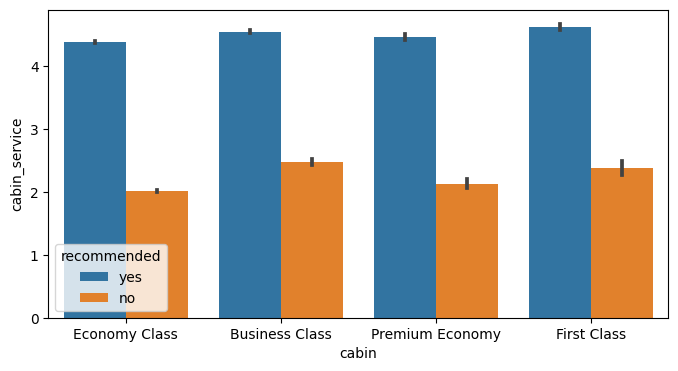

In [ ]:
#Cabin Vs Cabin service Vs Recommended

sns.barplot(data=air, x="cabin", y="cabin_service", hue="recommended")

- Even though the cabin service is close in rating for all the classes however recommendation rating is high in business class and low in economy class.

<Axes: xlabel='traveller_type', ylabel='overall'>

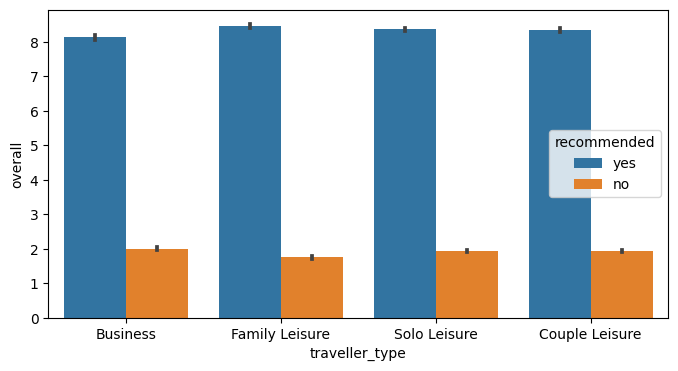

In [ ]:
# Taveller type Vs Overall rating Vs Recommended

sns.barplot(data=air, x="traveller_type", y="overall", hue="recommended")

In [ ]:
#Cabin Vs overall Vs Recommended

sns.barplot(data=air, x="cabin", y="overall", hue="recommended")

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

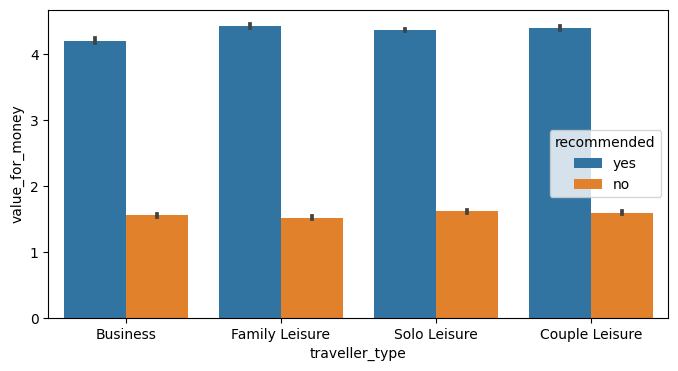

In [ ]:
#Recommended Vs Traveller Type Vs Value for Money

sns.barplot(data=air, x="traveller_type", y="value_for_money", hue="recommended")

Text(0.5, 1.0, 'Top 10 Airline ')

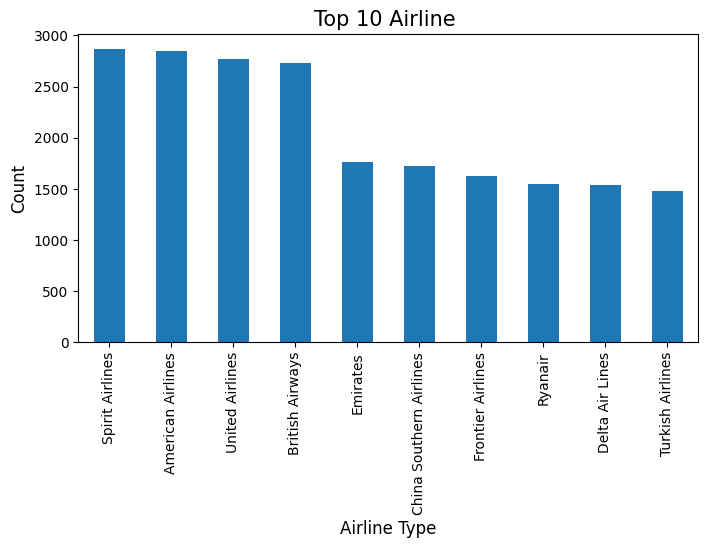

In [ ]:
#Top 10 Airline services

airlinecount = air['airline'].value_counts()
airlinecount[:10].plot(kind='bar')
plt.xlabel('Airline Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 10 Airline ',fontsize=15)

Top 10 airlines are:

1. Spirit Airlines

2. American Airlines

3. United Airlines

4. British Airways

5. Emirates

6. China southern airline

7. Frontier airlines

8. Ryanair

9. Delta air lines

10. Turkish airlines

In [ ]:
air.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

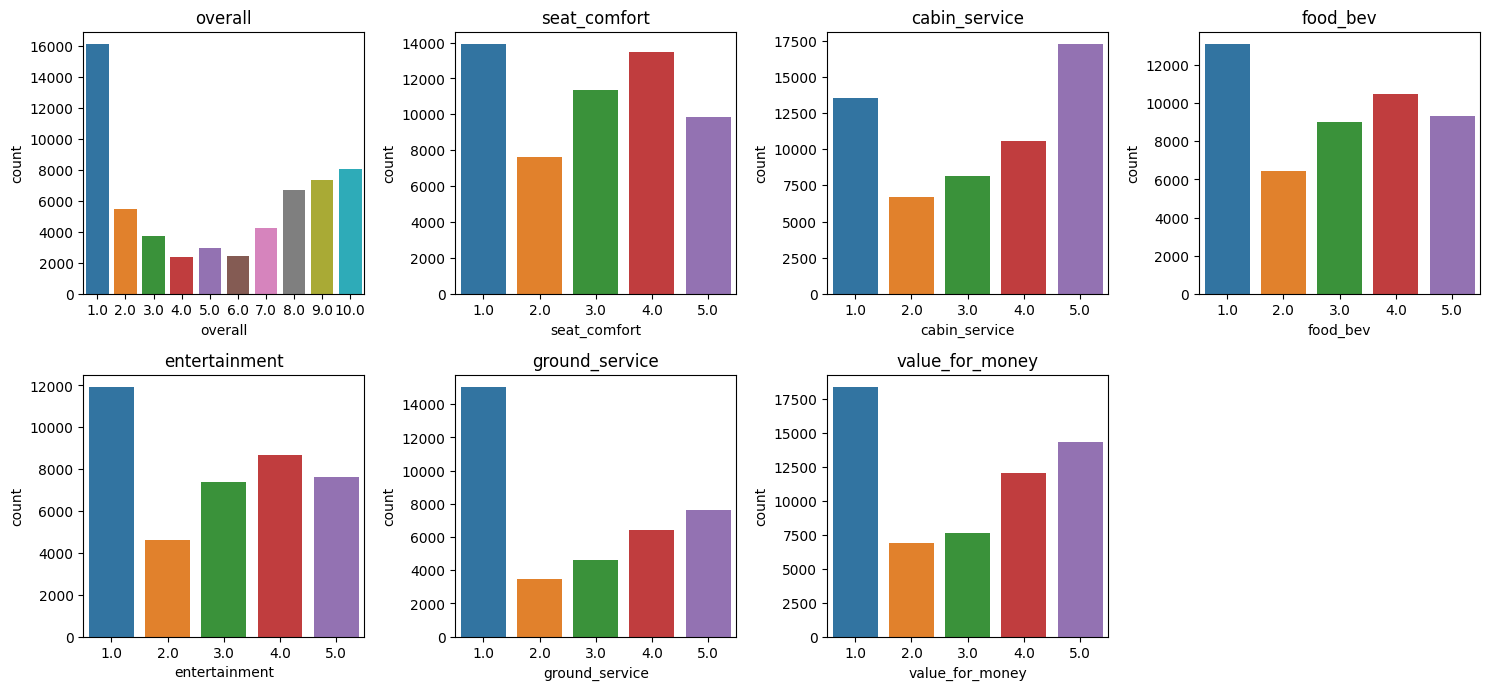

In [ ]:
fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
plt.title("overall")
sns.countplot(data=air,x='overall')

plt.subplot(3,4,2)
plt.title("seat_comfort")
sns.countplot(data=air,x='seat_comfort')

plt.subplot(3,4,3)
plt.title("cabin_service")
sns.countplot(data=air,x='cabin_service')

plt.subplot(3,4,4)
plt.title("food_bev")
sns.countplot(data=air,x='food_bev')

plt.subplot(3,4,5)
plt.title("entertainment")
sns.countplot(data=air,x='entertainment')

plt.subplot(3,4,6)
plt.title("ground_service")
sns.countplot(data=air,x='ground_service')

plt.subplot(3,4,7)
plt.title("value_for_money")
sns.countplot(data=air,x='value_for_money')


plt.tight_layout()
plt.show()


In [ ]:
air.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [ ]:
air.drop(['aircraft','author','review_date','customer_review','route','date_flown'], axis=1, inplace=True)

In [ ]:
air.sample()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
883,Turkish Airlines,8.0,Family Leisure,Business Class,4.0,4.0,4.0,4.0,3.0,4.0,yes


In [ ]:
line = air.copy()

**Checking Null Values and cleaning the data**

In [ ]:
line.isnull().sum()

airline                1
overall             1783
traveller_type     23644
cabin               2479
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [ ]:
#Filling the low missing value numerical columns with mean
low = ['overall','seat_comfort','cabin_service','value_for_money']

for i in low:
  values =  {i:line[i].mean()}
  line = line.fillna(value=values)

In [ ]:
#Filling the High missing value numerical columns with Median

high = ['food_bev','entertainment','ground_service']

for i in high:
  values =  {i:line[i].median()}
  line = line.fillna(value=values)

In [ ]:
line.isnull().sum()

airline                1
overall                0
traveller_type     23644
cabin               2479
seat_comfort           0
cabin_service          0
food_bev               0
entertainment          0
ground_service         0
value_for_money        0
recommended         1423
dtype: int64

In [ ]:
line.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,5.164863,NaN,NaN,2.959278,3.200231,3.0,3.0,3.0,2.950849,NaN
1,Turkish Airlines,7.000000,Business,Economy Class,4.000000,5.000000,4.0,4.0,2.0,4.000000,yes
3,Turkish Airlines,2.000000,Family Leisure,Economy Class,4.000000,1.000000,1.0,1.0,1.0,1.000000,no
5,Turkish Airlines,3.000000,Business,Economy Class,1.000000,4.000000,1.0,3.0,1.0,2.000000,no
7,Turkish Airlines,10.000000,Solo Leisure,Economy Class,4.000000,5.000000,5.0,5.0,5.0,5.000000,yes


In [ ]:
line.shape

(61184, 11)

In [ ]:
#Dropping the null values in Recommended column

line.dropna(subset=['recommended'], inplace=True)

In [ ]:
line.shape

(59761, 11)

In [ ]:
#Filling the 'Traveller Type' column null values with 'ffill' (Forward fill method)
line['traveller_type'].fillna(method="ffill",inplace=True)

In [ ]:
#Filling the 'Cabin' column null values with 'ffill' (Forward fill method)

line['cabin'].fillna(method="ffill",inplace=True)

In [ ]:
line.shape

(59761, 11)

In [ ]:
line.isnull().sum()

airline            0
overall            0
traveller_type     0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

In [ ]:
line.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes
9,Turkish Airlines,1.0,Solo Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
line.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 1 to 131894
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          59761 non-null  object 
 1   overall          59761 non-null  float64
 2   traveller_type   59761 non-null  object 
 3   cabin            59761 non-null  object 
 4   seat_comfort     59761 non-null  float64
 5   cabin_service    59761 non-null  float64
 6   food_bev         59761 non-null  float64
 7   entertainment    59761 non-null  float64
 8   ground_service   59761 non-null  float64
 9   value_for_money  59761 non-null  float64
 10  recommended      59761 non-null  object 
dtypes: float64(7), object(4)
memory usage: 5.5+ MB


In [ ]:
#Converting 'Recommended' column values from string to numerical

line['recommended'].replace({'yes':1,'no':0},inplace=True)

<Axes: >

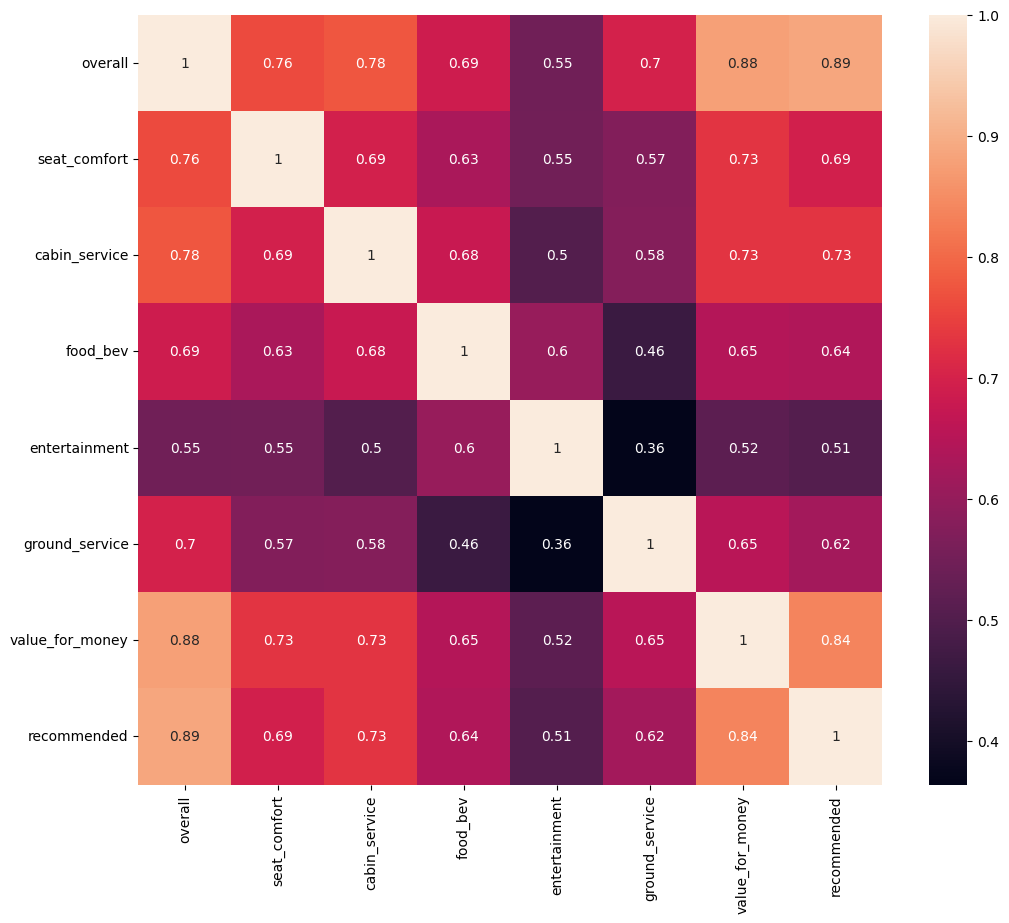

In [ ]:
# Plotting correlation  matrix for all features with respect to target variable

plt.figure(figsize=(12,10))
sns.heatmap(line.corr(), annot=True)

In [ ]:
#Creating a function to remove multicollinear
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [ ]:
calc_vif(line[[i for i in line.describe().columns if i not in ['recommended','value_for_money','overall']]])

,variables,VIF
0,seat_comfort,13.305956
1,cabin_service,13.770704
2,food_bev,13.423347
3,entertainment,9.794582
4,ground_service,8.535838


In [ ]:
#Dropping unnecessary columns

line.drop(['overall','airline'],axis = 1, inplace = True)

In [ ]:
line.head(2)

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1
3,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,0


In [ ]:
# split the Dataset into independent(x) and dependent(y) Dataset

x = line.drop(columns = ['recommended'])
y = line['recommended']

In [ ]:
x.head(2)

,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
1,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0
3,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
y.head(2)

1    1
3    0
Name: recommended, dtype: int64

In [ ]:
x = pd.get_dummies(x)

In [ ]:
# calling train_test_split() to get the training and testing data.

x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(47808, 14)
(11953, 14)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(47808,)
(11953,)


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59761 entries, 1 to 131894
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   seat_comfort                   59761 non-null  float64
 1   cabin_service                  59761 non-null  float64
 2   food_bev                       59761 non-null  float64
 3   entertainment                  59761 non-null  float64
 4   ground_service                 59761 non-null  float64
 5   value_for_money                59761 non-null  float64
 6   traveller_type_Business        59761 non-null  uint8  
 7   traveller_type_Couple Leisure  59761 non-null  uint8  
 8   traveller_type_Family Leisure  59761 non-null  uint8  
 9   traveller_type_Solo Leisure    59761 non-null  uint8  
 10  cabin_Business Class           59761 non-null  uint8  
 11  cabin_Economy Class            59761 non-null  uint8  
 12  cabin_First Class              59761 non-null

## ***ML Model Implementation***


### **Logistic Regression**

In [ ]:
#logistic regression fitting

log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.coef_

array([[ 0.45930061,  0.72994054,  0.35899441,  0.2192837 ,  0.70974581,
         1.56037225,  0.10740907, -0.06404376, -0.14693091,  0.09438755,
         0.15189074,  0.01217755,  0.04142611, -0.21467245]])

In [ ]:
log_reg.intercept_

array([-12.57932322])

In [ ]:
train_preds = log_reg.predict(x_train)
test_preds = log_reg.predict(x_test)

In [ ]:
#report of logistic regression

report_lR = classification_report(y_test, test_preds)
print(report_lR)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6277
           1       0.93      0.94      0.93      5676

    accuracy                           0.94     11953
   macro avg       0.94      0.94      0.94     11953
weighted avg       0.94      0.94      0.94     11953



[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

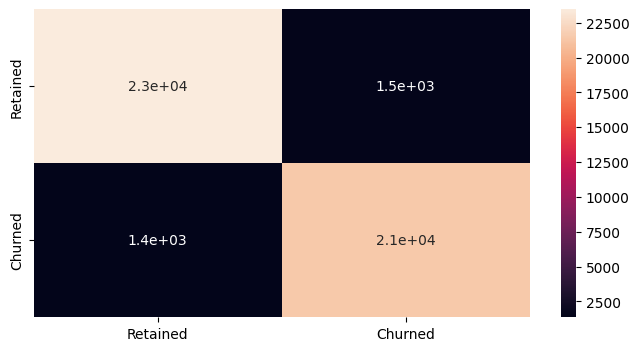

In [ ]:
#cofusion matrix of logistic regression

cm1 = confusion_matrix(y_train, train_preds)
labels = ['Retained', 'Churned']

ax= plt.subplot()
sns.heatmap(cm1, annot=True, ax = ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

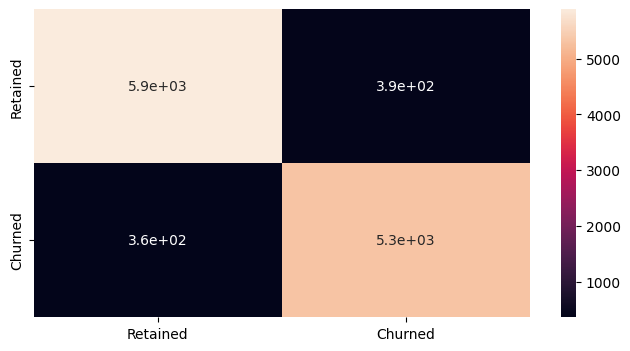

In [ ]:
cm2 = confusion_matrix(y_test, test_preds)
labels = ['Retained', 'Churned']

ax= plt.subplot()
sns.heatmap(cm2, annot=True, ax = ax)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
logistic = LogisticRegression()

In [ ]:
scores = cross_validate(logistic,x_train, y_train, cv = 5)

In [ ]:
scores

{'fit_time': array([0.4070816 , 0.36783051, 0.42200565, 0.41275215, 0.37713981]),
 'score_time': array([0.00498009, 0.0048902 , 0.00490522, 0.00489044, 0.00493217]),
 'test_score': array([0.93714704, 0.93693788, 0.94289898, 0.94226545, 0.93829097])}

In [ ]:
scores2 = pd.DataFrame(scores)
print(scores2)

   fit_time  score_time  test_score
0  0.407082    0.004980    0.937147
1  0.367831    0.004890    0.936938
2  0.422006    0.004905    0.942899
3  0.412752    0.004890    0.942265
4  0.377140    0.004932    0.938291


In [ ]:
scores2['test_score'].min(), scores2['test_score'].mean(), scores2['test_score'].max()

(0.9369378791047898, 0.939508064346939, 0.9428989751098097)

### **Decision Tree Classifier**

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
train_preds = dtc.predict(x_train)
test_preds = dtc.predict(x_test)

In [ ]:
accuracy_score(y_test, test_preds) * 100

91.92671295908977

In [ ]:
report_dtc = classification_report(y_test, test_preds)
print(report_dtc)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6277
           1       0.92      0.91      0.91      5676

    accuracy                           0.92     11953
   macro avg       0.92      0.92      0.92     11953
weighted avg       0.92      0.92      0.92     11953



###**Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = grid_values,
                       cv = 5, verbose=2, scoring='roc_auc')

In [ ]:
rfc_grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................max_depth=3, n_estimators=50; total time=   0.8s
[CV] END .......................max_depth=3, n_estimators=50; total time=   1.0s
[CV] END .......................max_depth=3, n_estimators=50; total time=   1.2s
[CV] END .......................max_depth=3, n_estimators=50; total time=   2.3s
[CV] END .......................max_depth=3, n_estimators=50; total time=   2.1s
[CV] END .......................max_depth=3, n_estimators=80; total time=   2.0s
[CV] END .......................max_depth=3, n_estimators=80; total time=   1.5s
[CV] END .......................max_depth=3, n_estimators=80; total time=   1.5s
[CV] END .......................max_depth=3, n_estimators=80; total time=   1.0s
[CV] END .......................max_depth=3, n_estimators=80; total time=   0.9s
[CV] END ......................max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ......................max_depth=3, n_est

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc', verbose=2)

In [ ]:
train_preds =  rfc_grid.predict(x_train)
test_preds  = rfc_grid.predict(x_test)

In [ ]:
accuracy_score(y_train,train_preds)

0.9411813922356091

In [ ]:
accuracy_score(y_test,test_preds)

0.9373379068016398

In [ ]:
roc_auc_score(y_train,train_preds)

0.9408669778787894

In [ ]:
rfc_grid.score(x_test,y_test)

0.9824141807462234

In [ ]:
report_ran_forest = classification_report(y_test, test_preds)
print(report_ran_forest)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6277
           1       0.94      0.93      0.93      5676

    accuracy                           0.94     11953
   macro avg       0.94      0.94      0.94     11953
weighted avg       0.94      0.94      0.94     11953



In [ ]:
rfc_grid.best_params_

{'max_depth': 7, 'n_estimators': 100}

###**K-Nearest Neighbour**


In [ ]:
knc = KNeighborsClassifier()

In [ ]:
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
train_accuracy = knc.score(x_train, y_train)

In [ ]:
print(train_accuracy)

0.9489625167336011


In [ ]:
test_accuracy = knc.score(x_test, y_test)
print(test_accuracy)

0.9341587885886389


In [ ]:
train_pred = knc.predict(x_train)
test_pred = knc.predict(x_test)

In [ ]:
confusion_matrix(y_test,test_pred)

array([[5871,  406],
       [ 381, 5295]])

In [ ]:
roc_auc_score(y_test,test_pred)

0.9340973421878794

###**Support Vector Machine**

In [ ]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
svm.support_vectors_

array([[2.        , 4.        , 4.        , ..., 1.        , 0.        ,
        0.        ],
       [4.        , 4.        , 2.        , ..., 1.        , 0.        ,
        0.        ],
       [3.        , 3.        , 4.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [2.95927843, 3.20023115, 3.        , ..., 0.        , 0.        ,
        0.        ],
       [3.        , 3.        , 3.        , ..., 0.        , 0.        ,
        1.        ],
       [3.        , 3.        , 4.        , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
train_preds =  svm.predict(x_train)
test_preds  = svm.predict(x_test)

In [ ]:
cm= confusion_matrix(y_test, test_preds)
cm

array([[5868,  409],
       [ 344, 5332]])

In [ ]:
svm.score(x_test, y_test)

0.9370032627792186

### **Conclusion**:

The Models used for this Classsification problem are

1.Logistic Regression Model

2.Decision Tree Model

3.Random Forest Model

4.K-Nearest Neighbor Model

5.Support Vector Machine,

94% accuracy with Logistic Regression,

92% accuracy with Decision Tree Model,

93% accuracy with Random Forest model,

93% accuracy with K-Nearest Neighbor Model,

93% accuracy with Support Vector Machine,

Even though all the models gave ccuracy rate above 90%, Logistic regression is sligtly more accurate than other models. Hence for this, Logistic Regression is best model.

Overall rating and Value for money contributes to a model's prediction whether a passenger will recommened a particular airline to their friends.

As a result, in order to increase their business or grow, our client must provide excellent cabin service, ground service, food beverage entertainment, and seat comfort as these contribute to overall rating and value for money rating.
